# Travelling Salesman Problem solved by Genetic Algorithm
Group Members:<br>
    21ucs030 : Arpit Gupta<br>
    21ucs031 : Arpit Jain<br>
    21ucs073 : Divyansh Garg<br>
    21ucs077 : Elishben Manojbhai Baraiya<br>

In [11]:
# Given Guidlines/Instructions

#    No. of cities   :  15;
#    Distance matrix :  input;
#    Population size :  15;
#    Generation_limit:  20;
#    Output          :  sequence of cities to travel(in order);
#    Fitness Func    :  total distance traveled;
#    Selection Func  :  Roullete Wheel;
#    Crossover Func  :  single point(randomly selected);
#    next population :  elitism;
   
#    NOTE: each city represented only once in the solution


In [12]:
# Representing the solution in form of chromosome/genome
# a genome will be a list of size 15(no. of cities) containing no. of the city in order of visit by salesman
import random

cities = [i for i in range(1,16)]
def generate_genome():
    genome=[]
    global cities
    for i in range(15):
        c = random.choice(cities)
        genome.append(c)
        cities.remove(c)
    cities = [i for i in range(1,16)]
    return genome


#Taking the user input for distance matrix
distance = [[0 for i in range(15)] for j in range(15)]



# Currently populating distance matrix with random inputs
for i in range(15):
    for j in range(15):
        distance[i][j]=random.randint(1,20)
distance

[[14, 20, 19, 13, 2, 19, 9, 18, 20, 6, 6, 5, 19, 3, 11],
 [9, 5, 13, 1, 18, 10, 5, 17, 7, 20, 2, 19, 16, 1, 14],
 [4, 4, 18, 7, 11, 5, 2, 15, 2, 14, 14, 8, 8, 9, 10],
 [8, 8, 11, 8, 11, 14, 17, 15, 5, 5, 8, 9, 13, 4, 19],
 [9, 9, 2, 3, 18, 3, 9, 10, 2, 4, 20, 4, 2, 19, 18],
 [12, 4, 1, 17, 11, 19, 15, 11, 17, 18, 19, 7, 16, 16, 7],
 [19, 2, 12, 7, 6, 1, 20, 18, 20, 4, 7, 5, 3, 19, 3],
 [7, 15, 15, 12, 12, 6, 16, 8, 15, 18, 10, 16, 10, 15, 19],
 [11, 16, 18, 16, 19, 3, 1, 6, 12, 17, 2, 20, 18, 3, 12],
 [8, 1, 1, 6, 15, 19, 2, 16, 9, 11, 1, 5, 17, 12, 18],
 [9, 11, 4, 10, 1, 4, 4, 1, 17, 14, 13, 4, 9, 2, 16],
 [4, 19, 10, 16, 8, 16, 4, 15, 10, 11, 19, 11, 10, 2, 3],
 [20, 7, 14, 13, 1, 18, 5, 11, 15, 10, 7, 11, 9, 5, 2],
 [15, 6, 5, 3, 8, 3, 15, 14, 9, 20, 3, 16, 13, 19, 17],
 [13, 20, 11, 18, 11, 12, 9, 18, 13, 15, 3, 8, 17, 6, 7]]

In [13]:
# Step1: Initialize the population(of size 15)

population =[generate_genome() for i in range(15)]
population 

[[13, 12, 14, 10, 7, 11, 15, 1, 6, 8, 2, 4, 5, 9, 3],
 [4, 9, 13, 6, 7, 5, 1, 8, 11, 3, 2, 14, 12, 10, 15],
 [9, 3, 6, 1, 8, 7, 11, 13, 12, 5, 14, 10, 2, 4, 15],
 [2, 10, 1, 15, 4, 6, 3, 12, 8, 13, 9, 11, 14, 7, 5],
 [15, 1, 12, 5, 9, 11, 10, 6, 2, 8, 7, 14, 13, 3, 4],
 [2, 7, 3, 4, 14, 12, 9, 13, 1, 10, 11, 5, 8, 15, 6],
 [8, 11, 4, 6, 3, 2, 7, 13, 12, 10, 1, 9, 15, 14, 5],
 [6, 13, 15, 4, 7, 5, 11, 1, 2, 9, 8, 10, 14, 12, 3],
 [10, 6, 7, 5, 13, 2, 3, 8, 1, 12, 14, 9, 11, 15, 4],
 [15, 4, 7, 5, 10, 2, 3, 6, 13, 11, 8, 12, 14, 9, 1],
 [13, 9, 7, 8, 2, 11, 3, 14, 1, 10, 12, 4, 6, 5, 15],
 [3, 7, 6, 14, 9, 8, 12, 11, 1, 15, 5, 2, 10, 13, 4],
 [15, 6, 4, 8, 3, 10, 7, 1, 2, 12, 11, 14, 13, 5, 9],
 [12, 7, 11, 10, 4, 8, 3, 9, 1, 15, 6, 13, 14, 5, 2],
 [15, 6, 4, 11, 7, 1, 14, 9, 13, 8, 2, 10, 12, 5, 3]]

In [14]:
#defining a Fitness function

# since travelling salesman is a minimization problem 
# so if total distance is minimum of a genome than it is more fit
# hence lets subtract total distance from 20(max dist between two cities)*15 = 300 to get its fitness value

def fitness(genome,distance):
    total=0
    for i in range(14):
        total += distance[genome[i]-1][genome[i+1]-1]  
    total+=distance[genome[14]-1][genome[0]-1]
    return 300-total

#function to calculate fitness of each genome of population of current generation
def pop_fit(population,distance):
    return [fitness(population[i],distance) for i in range(15)]
                                    
population_fitness=pop_fit(population,distance)

population_fitness

[144, 129, 123, 146, 128, 155, 167, 118, 159, 163, 134, 130, 118, 146, 139]

In [15]:
#defining selection function (Roullete Wheel based)


def selection(population,population_fitness):
     
    #first computing the Roullete wheel probabilities for each genome of population
    Sum=0
    for i in range(15):
        Sum+=population_fitness[i]
    
    rw_prob = list(map(lambda x: x/Sum,population_fitness))
    
    parents = random.choices(population,weights=rw_prob,k=2)
    return parents


In [16]:
#defining crossover function (random single point based)


def crossover(parent1,parent2):
    r = random.randint(2,12)
    
    offspring1 = parent1.copy()
    for i in range(r,15):
        j = offspring1.index(parent2[i])
        temp = offspring1[i]
        offspring1[i]=offspring1[j]
        offspring1[j]=temp
    
    offspring2 = parent2.copy()
    for i in range(r,15):
        j = offspring2.index(parent1[i])
        temp = offspring2[i]
        offspring2[i]=offspring2[j]
        offspring2[j]=temp
        
    offspring3 = parent1.copy()
    for i in range(0,r):
        j = offspring3.index(parent2[i])
        temp = offspring3[i]
        offspring3[i]=offspring3[j]
        offspring3[j]=temp
    
    offspring4 = parent2.copy()
    for i in range(0,r):
        j = offspring4.index(parent1[i])
        temp = offspring4[i]
        offspring4[i]=offspring4[j]
        offspring4[j]=temp
        
    return offspring1,offspring2,offspring3,offspring4


In [24]:
#defining mutation function 


def mutation(genome,mutation_rate=0.05):
    mask = [random.random() for i in range(15)]
    for i in range(15):
        if(mask[i]<mutation_rate):
            #mutation happens
            j = random.randint(0,14)
            temp = genome[i]
            genome[i]=genome[j]
            genome[j]=temp
        
             

In [29]:
#defining new population for next evolution (using elitism)

def find_best(population,population_fitness):
    max=-1
    max_index=0
    for i in range(15):
        if(population_fitness[i]>max):
            max=population_fitness[i]
            max_index=i
    return population[max_index]

def find_avg(population_fitness):
    return sum(population_fitness)/15

def find_weak(population,population_fitness):
    min=350
    min_index=0
    for i in range(15):
        if(population_fitness[i]<min):
            min=population_fitness[i]
            min_index=i
    return population[min_index]

def new_population(parent_pop,offspring_pop,parent_pop_fitness,offspring_pop_fitness):
    new_pop = offspring_pop
    new_pop.remove(find_weak(offspring_pop,offspring_pop_fitness))
    new_pop.append(find_best(parent_pop,parent_pop_fitness))
    
    return new_pop



In [50]:
# making the final evolutionary algorithm

def evolution(population,distance,no_of_gens):
    gen_bests=[0 for i in range(no_of_gens)]
    gen_avg=[0 for i in range(no_of_gens)]
    curr_gen=population.copy()
    for i in range(no_of_gens):
        curr_gen_fit=pop_fit(curr_gen,distance)
        
        #find best and avg fitness of this generation
        gen_bests[i]=curr_gen_fit[curr_gen.index(find_best(curr_gen,curr_gen_fit))]
        gen_avg[i]=find_avg(curr_gen_fit)
        
        j=0
        next_gen=[]
        while(j<16):
            #selection of parents and reproducing 4 offsprings
            parent=selection(curr_gen,curr_gen_fit)
            next_gen+=list(crossover(parent[0],parent[1]))
            j+=4
        
        next_gen.pop() 
        
        #Mutation
        for k in range(15):
            mutation(next_gen[k])
        
        next_gen_fit=pop_fit(next_gen,distance)
        
        #making the new population of next_generation using elitism
        curr_gen=new_population(curr_gen,next_gen,curr_gen_fit,next_gen_fit)
    
    
    curr_gen_fit=pop_fit(curr_gen,distance)
    gen_bests[-1]=curr_gen_fit[curr_gen.index(find_best(curr_gen,curr_gen_fit))]
    gen_avg[-1]=find_avg(curr_gen_fit)
    
    best_sol = find_best(curr_gen,curr_gen_fit)
    return gen_bests,gen_avg,best_sol

# taking 20 as the maximum no. of gens
gen_bests,gen_avg,best_sol = evolution(population,distance,20)

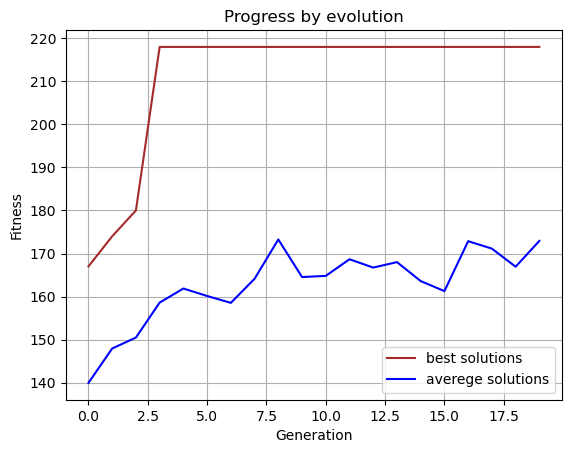

best solution is :  [6, 3, 9, 1, 12, 7, 14, 4, 10, 2, 11, 5, 13, 15, 8]  : salesman will have to travel  82 km in total 

In [52]:
import numpy as np
import matplotlib.pyplot as plt

no_of_gens=20
x_val = np.arange(0,no_of_gens)
y_val_1 = np.array(gen_bests)
y_val_2 = np.array(gen_avg)
plt.plot(x_val,y_val_1,color = "brown",label="best solutions")
plt.plot(x_val,y_val_2,color = "blue",label="averege solutions")

plt.title("Progress by evolution")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid()
plt.legend()
plt.show()


print("best solution is : ",best_sol," : salesman will have to travel ",300-gen_bests[-1],"km in total",end=" ")


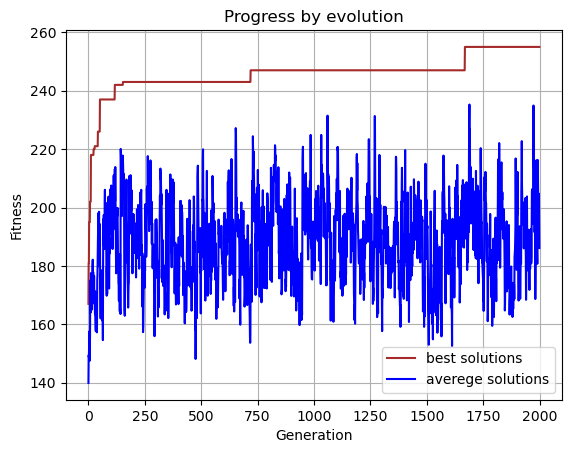

best solution is :  [8, 13, 5, 9, 7, 6, 2, 14, 4, 10, 3, 1, 12, 15, 11]  : salesman will have to travel  45 km in total 

In [53]:
# JUST FOR CURIOSITY lets run evolution for 2000 generations
no_of_gens = 2000
gen_bests,gen_avg,best_sol = evolution(population,distance,no_of_gens)

x_val = np.arange(0,no_of_gens)
y_val_1 = np.array(gen_bests)
y_val_2 = np.array(gen_avg)
plt.plot(x_val,y_val_1,color = "brown",label="best solutions")
plt.plot(x_val,y_val_2,color = "blue",label="averege solutions")

plt.title("Progress by evolution")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid()
plt.legend()
plt.show()


print("best solution is : ",best_sol," : salesman will have to travel ",300-gen_bests[-1],"km in total",end=" ")
